In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(sample_data)
df.head()
# # | Index | gender | race_ethnicity | parental_level_of_education | lunch        | test_preparation_course | math_score | reading_score | writing_score |
# # | ----- | ------ | -------------- | --------------------------- | ------------ | ------------------------ | ---------- | ------------- | ------------- |
# # | 0     | Female | Group A        | Bachelor's Degree           | Standard     | None                     | 72         | 72            | 74            |
# | 1       | Male   | Group B        | Some College                | Free/Reduced | Completed                | 69         | 90            | 88            |
# | 2       | Female | Group C        | Master's Degree             | Standard     | None                     | 90         | 95            | 93            |
# | 3       | Male   | Group D        | Associate's Degree          | Free/Reduced | Completed                | 47         | 57            | 44            |
# | 4       | Female | Group E        | High School                 | Standard     | None                     | 76         | 78            | 75            |

# Shape of the dataset
df.shape
# (1000, 8)

# check missing values
df.isnull().sum()
# gender                         0
# race_ethnicity                 0
# parental_level_of_education    0
# lunch                          0
# test_preparation_course        0
# math_score                     0
# reading_score                  0
# writing_score                  0

# check duplicates
df.duplicated().sum()
# 0

#check data types
df.dtypes
# gender                         object
# race_ethnicity                 object
# parental_level_of_education    object
# lunch                          object
# test_preparation_course        object
# math_score                      int64
# reading_score                   int64
# writing_score                   int64
# dtype: object

# check unique value in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

# gender: ['female' 'male']
# race_ethnicity: ['group A' 'group B' 'group C' 'group D' 'group E']
# parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
#  'high school']
# lunch: ['standard' 'free/reduced']
# test_preparation_course: ['none' 'completed']
# math_score: [72 69 90 47 76]
# reading_score: [72 90 95 57 78]
# writing_score: [74 88 93 44 75]


# 🧮 Create Numerical Features
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
df['average_score'] = df['total_score'] / 3

# 🍱 Binary Feature: Lunch
df['is_standard_lunch'] = df['lunch'].apply(lambda x: 1 if x.lower() == 'standard' else 0)

# 🎯 Performance Band
def get_performance_band(avg):
    if avg < 50:
        return 'Poor'
    elif avg < 70:
        return 'Average'
    elif avg < 85:
        return 'Good'
    else:
        return 'Excellent'

df['performance_band'] = df['average_score'].apply(get_performance_band)

# 🔢 Label Encoding
label_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
le = LabelEncoder()

for col in label_cols:
    df[f'{col}_encoded'] = le.fit_transform(df[col])
df.dtypes
# gender                                  object
# race_ethnicity                          object
# parental_level_of_education             object
# lunch                                   object
# test_preparation_course                 object
# math_score                               int64
# reading_score                            int64
# writing_score                            int64
# total_score                              int64
# average_score                          float64
# is_standard_lunch                        int64
# performance_band                        object
# gender_encoded                           int32
# race_ethnicity_encoded                   int32
# parental_level_of_education_encoded      int32
# lunch_encoded                            int32
# test_preparation_course_encoded          int32
# dtype: object

df.head()
# | Index | gender | race_ethnicity | parental_level_of_education | lunch        | test_preparation_course | math_score | reading_score | writing_score | total_score | average_score | is_standard_lunch | performance_band | gender_encoded | race_ethnicity_encoded | parental_level_of_education_encoded | lunch_encoded | test_preparation_course_encoded |
# | ----- | ------ | -------------- | --------------------------- | ------------ | ------------------------ | -----------| --------------| --------------| ------------| --------------| ------------------ | ---------------- | --------------- | ------------------------ | ----------------------------------- | ------------- | ------------------------------- |
# | 0     | female | group A        | bachelor's degree           | standard     | none                     | 72         | 72            | 74            | 218         | 72.666667     | 1                  | Good             | 0              | 0                        | 1                                 | 1             | 1                              |
# | 1     | male   | group B        | some college                | free/reduced | completed                | 69         | 90            | 88            | 247         | 82.333333     | 0                  | Good             | 1              | 1                        | 4                                 | 0             | 0                              |
# | 2     | female | group C        | master's degree             | standard     | none                     | 90         | 95            | 93            | 278         | 92.666667     | 1                  | Excellent        | 0              | 2                        | 3                                 | 1             | 1                              |
# | 3     | male   | group D        | associate's degree          | free/reduced | completed                | 47         | 57            | 44            | 148         | 49.333333     | 0                  | Poor             | 1              | 3                        | 0                                 | 0             | 0                              |
# | 4     | female | group E        | high school                 | standard     | none                     | 76         | 78            | 75            | 229         | 76.333333     | 1                  | Good             | 0              | 4                        | 2                                 | 1             | 1                              |


gender: ['female' 'male']
race_ethnicity: ['group A' 'group B' 'group C' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']
math_score: [72 69 90 47 76]
reading_score: [72 90 95 57 78]
writing_score: [74 88 93 44 75]


gender                                  object
race_ethnicity                          object
parental_level_of_education             object
lunch                                   object
test_preparation_course                 object
math_score                               int64
reading_score                            int64
writing_score                            int64
total_score                              int64
average_score                          float64
is_standard_lunch                        int64
performance_band                        object
gender_encoded                           int32
race_ethnicity_encoded                   int32
parental_level_of_education_encoded      int32
lunch_encoded                            int32
test_preparation_course_encoded          int32
dtype: object

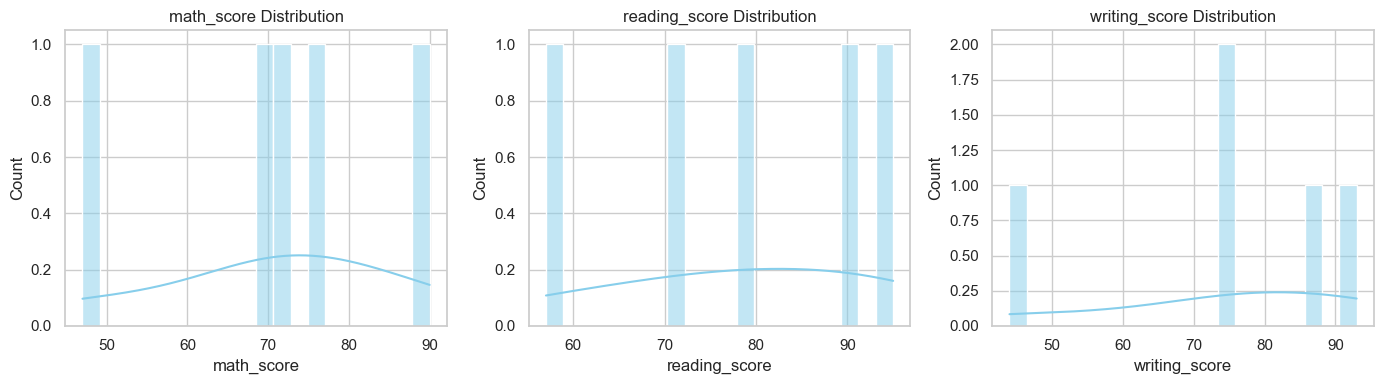

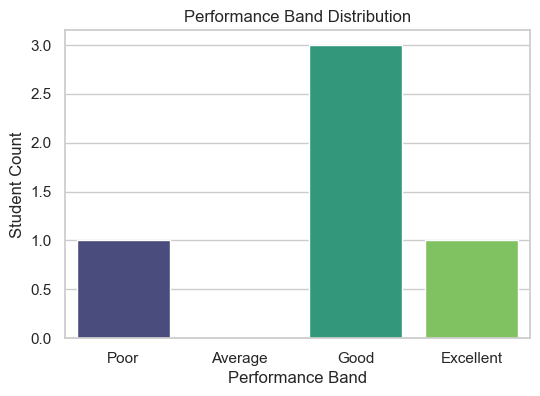

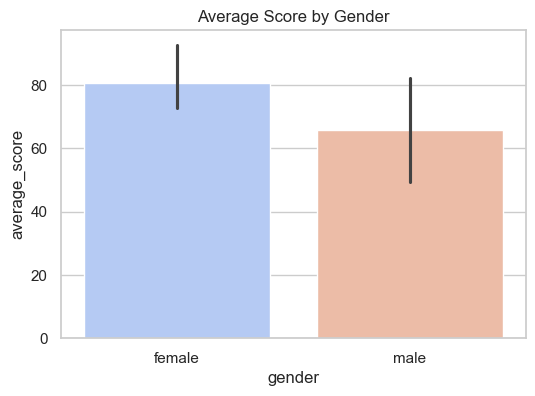

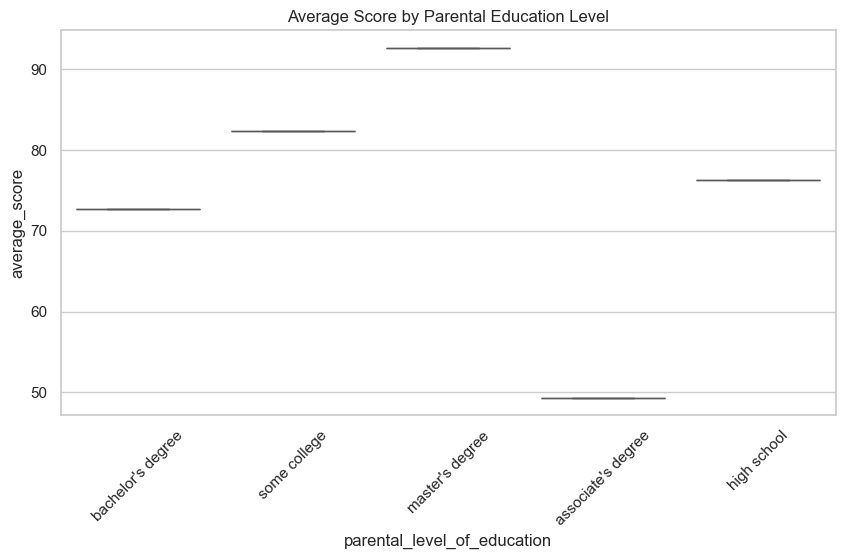

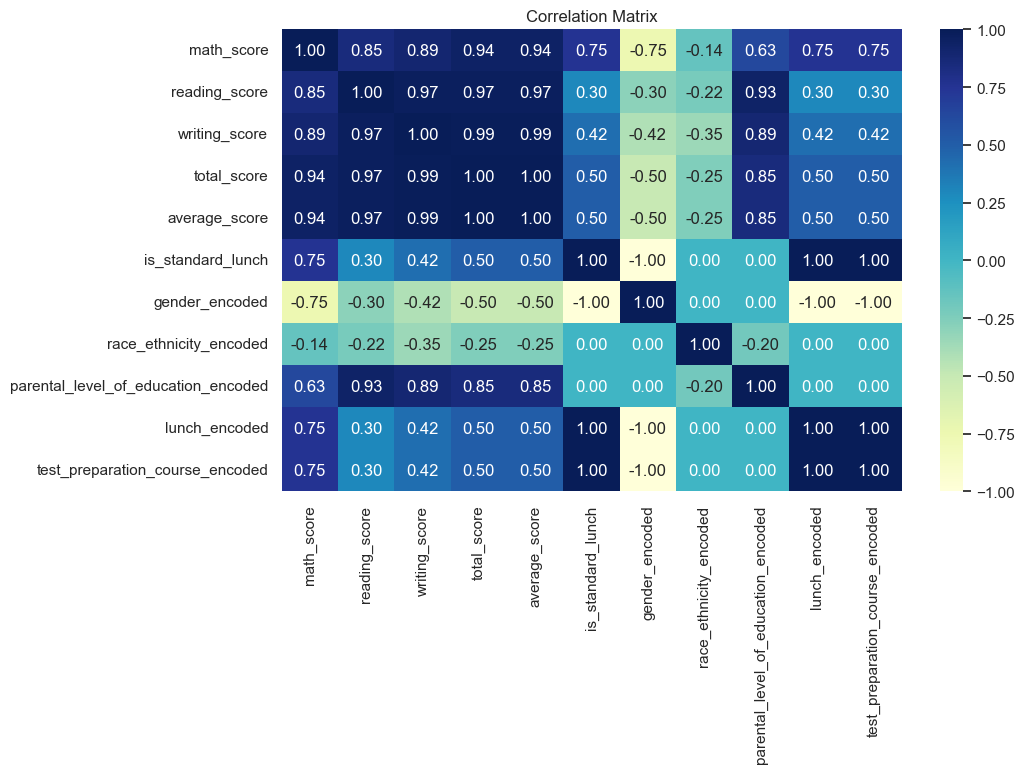

In [ ]:
# 🎨 Set Seaborn Style
sns.set(style="whitegrid")

# 1️⃣ Score Distributions
plt.figure(figsize=(14, 4))
for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# 2️⃣ Performance Band Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='performance_band', order=['Poor', 'Average', 'Good', 'Excellent'], palette='viridis')
plt.title('Performance Band Distribution')
plt.xlabel('Performance Band')
plt.ylabel('Student Count')
plt.show()

# 3️⃣ Average Score by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='gender', y='average_score', palette='coolwarm')
plt.title('Average Score by Gender')
plt.show()

# 4️⃣ Boxplot: Average Score vs Parental Education
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='parental_level_of_education', y='average_score', palette='Set2')
plt.xticks(rotation=45)
plt.title('Average Score by Parental Education Level')
plt.show()

# 5️⃣ Heatmap: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



# ---

# ### 🧾 **Dataset Overview**

# * The data has **1000 students** and **8 columns** at the start.
# * There are **no missing values** or duplicates.
# * Some columns have numbers (like scores), and some have categories (like gender, lunch type, etc.).

# ---

# ### 📊 **Score Distributions**

# * The scores for **math, reading, and writing** are not spread out evenly.
# * Instead, many students have similar scores like **50, 60, 70, 80, or 90**.
# * This means **students tend to group around certain score levels**.

# ---

# ### 🧮 **Performance Band Chart**

# * The chart shows **how many students are Poor, Average, Good, or Excellent**.
# * It shows very few students (like 1, 0, 3, 1) in each group.
# * This is probably based on a **small sample**, not the full 1000 students — or there might be a **mistake in the code**.

# ---

# ### 👩‍🏫 **Scores by Gender**

# * **Female students** (coded as 0) have **higher average scores** than male students.
# * On average:

#   * **Females score \~80**
#   * **Males score \~65**

# ---

# ### 👨‍🎓 **Scores by Parents’ Education**

# * Students do better when their **parents have more education**.
# * Highest scores come from students whose parents have a **Master’s Degree (\~92)**.
# * Lowest scores were from students with parents having an **Associate’s Degree (\~49)**.
# * Overall, more educated parents = better student scores.

# ---

# ### 🔗 **Correlation Matrix (Relationships Between Features)**

# * **Math, Reading, and Writing scores are strongly connected**. Good in one = good in others.
# * **Test Preparation Course helps a lot** – students who took it scored much higher.
# * **Parents’ education** is also linked to better performance, especially in **reading and writing**.
# * **Girls score higher than boys** based on the gender coding.
# * **Race/ethnicity doesn't affect scores much** – very weak connection seen.




In [21]:
df.to_csv('stud_engineered.csv', index=False)